# **Trabajo Práctico Integrador - Curso de Ciencia de Datos**

Fabio Daniel Maksimchuk



```
# Tiene formato de código
```

# Contexto y Problemática

**Contexto**:
Poder determinar el porcentaje de riesgo que tiene una persona según su locación física (provincia y departamento) y rango etáreo puede resultar de utilidad como insumo para evaluar estrategias de enfoque del proceso de vacunación a los ciudadanos de Argentina.

**Problemática**: según el impacto y prevalencia de la enfermedad por región y grupo etáreo, en algunas provincias y ciudades de Argentina los gobiernos están brindando vacunación gratuita a los ciudadanos. Por otro lado hay personas que (por poder acceder económicamente a la vacuna deciden aplicarla). Sin embargo, no existe una herramienta que permita, a partir de datos históricos de los últimos años **determinar y sugerir cuál es la población objetivo a la que convendría aplicar la vacunación según su edad y lugar físico en el que se encuentren**.

Sería que, dada una persona de X edad y que vive en la ciudad Y, responder a la pregunta:
*   ¿Qué porcentaje de riesgo contraer dengue tiene la persona? x %
*   ¿Conviene aplicársele la vacuna? Si o no. La respuesta a esta pregunta depende de varios factores, pero el porcentaje de riesgo puede ser un input para responder.



El presente trabajo práctico integrador se basa en:


*   Utilizar como dataset de datos de casos de Dengue en Argentina para el año en curso y años previos, publicados en la web de datos públicos de Argentina en https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika  
*   Definir el valor de la variable porcentaje (indicará el porcentaje de contraer dengue) de forma empírica a partir de datos de las siguientes fuentes: https://www.lanacion.com.ar/sociedad/llama-la-atencion-cual-es-la-tasa-de-letalidad-del-dengue-en-la-argentina-y-que-advierten-los-nid09042024/ y https://chequeado.com/el-explicador/radiografia-de-la-epidemia-historica-de-dengue-en-la-argentina/  
*   Aplicar algoritmos de Time Series Forecasting para hacer una clasificación y/o proyección del porcentaje de incidencia de estos casos según edad y lugar físico (provincia y departamento)





In [ ]:
#importo las librerias que necesito
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #matplotlib - lib para graficos
import numpy as np
import statsmodels.api as sm #api implementa modelos de time series reggression

#leo el dataset de datos
file_path = "/content/dengue casos TPI 210924.csv"

df = pd.read_csv(file_path)

# Descripción de los Datos

Acciones para la descripción de datos:


1.   Dimensiones de los datos
2.   Tipos de datos
3.   Distribución y propiedades estadísticas
4.   Nulos
5.   Datos repetidos





In [ ]:
#dimensiones de los datos
df.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,ano,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos,porcentaje_riesgo
0,2003.0,COMUNA 3,2,CABA,2018,15.0,Dengue,6,de 10 a 14 anos,1,20
1,2004.0,COMUNA 4,2,CABA,2018,6.0,Dengue,6,de 10 a 14 anos,1,20
2,6091.0,Berazategui,6,Buenos Aires,2018,11.0,Dengue,7,de 15 a 24 anos,1,30
3,6091.0,Berazategui,6,Buenos Aires,2018,14.0,Dengue,9,de 25 a 34 anos,2,70
4,6091.0,Berazategui,6,Buenos Aires,2018,19.0,Dengue,11,de 45 a 65 anos,1,50


In [ ]:
#dimensiones en cantidades de filas y columnas
cant_filas, cant_columnas = df.shape
print(f"La cantidad de filas es: {cant_filas} y la cantidad de columnas es {cant_columnas} del conjunto de datos")

La cantidad de filas es: 49483 y la cantidad de columnas es 11 del conjunto de datos


In [ ]:
#tipos de datos
df.dtypes

,0
departamento_id,float64
departamento_nombre,object
provincia_id,int64
provincia_nombre,object
ano,int64
semanas_epidemiologicas,float64
evento_nombre,object
grupo_edad_id,object
grupo_edad_desc,object
cantidad_casos,int64


In [ ]:
#mas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49483 entries, 0 to 49482
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departamento_id          49481 non-null  float64
 1   departamento_nombre      49483 non-null  object 
 2   provincia_id             49483 non-null  int64  
 3   provincia_nombre         49483 non-null  object 
 4   ano                      49483 non-null  int64  
 5   semanas_epidemiologicas  13553 non-null  float64
 6   evento_nombre            49483 non-null  object 
 7   grupo_edad_id            49480 non-null  object 
 8   grupo_edad_desc          49483 non-null  object 
 9   cantidad_casos           49483 non-null  int64  
 10  porcentaje_riesgo        49483 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [ ]:
#Propiedades estadisticas de los datos
df.describe()

,departamento_id,provincia_id,ano,semanas_epidemiologicas,cantidad_casos,porcentaje_riesgo
count,49481.000000,49483.000000,49483.000000,13553.000000,49483.000000,49483.000000
mean,11527.103878,38.294647,2022.785846,14.783221,12.990643,47.381323
std,23412.032167,30.448148,1.907927,5.920550,49.543516,26.270656
min,0.000000,0.000000,2018.000000,1.000000,1.000000,10.000000
25%,49.000000,6.000000,2020.000000,11.000000,1.000000,20.000000
50%,119.000000,30.000000,2024.000000,15.000000,2.000000,50.000000
75%,6410.000000,66.000000,2024.000000,18.000000,8.000000,70.000000
max,94014.000000,99.000000,2024.000000,53.000000,2347.000000,90.000000


# Preparación de los Datos

**Preparación del dataset de datos**

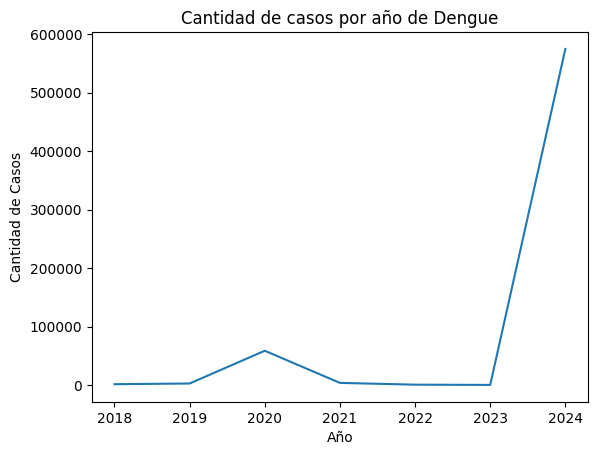

In [ ]:
#analisis preliminar del conjunto de datos

#variable data para generar el dataset de datos

columns = ['ano', 'cantidad_casos']
data = pd.DataFrame(df, columns=columns)

# Sumarizar los valores de la columna 'Valores' por la columna 'Categoría'
sumarizado = data.groupby('ano')['cantidad_casos'].sum()

# Mostrar el resultado sumarizado
#print(sumarizado)

# Graficar el resultado con matplotlib
sumarizado.plot(kind='line')  # Gráfico de barras

# Añadir etiquetas y título
plt.title('Cantidad de casos por año de Dengue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')

# Mostrar la gráfica
plt.show()


**Conclusión a alto nivel**: hay datos para todos los años, curva de casos en incremento. Estacionalidad y constancia en algunos periodos e incremento entre los años 2023 y 2014

In [ ]:
#preparo un nuevo subconjunto de columnas sobre las que voy a trabajar
# casos aperturados por: año, provincia, departamento, rango etáreo y porcentaje de riesgo de adquirir dengue para cada caso

#nota: la variable "porcentaje_riesgo" fue generada teniendo en cuenta datos del contexto de dengue en el pais de forma empirica

columns = ['ano', 'provincia_nombre','departamento_nombre','grupo_edad_desc','cantidad_casos','porcentaje_riesgo']
data_analisis = pd.DataFrame(df, columns=columns)
data_analisis.head()

,ano,provincia_nombre,departamento_nombre,grupo_edad_desc,cantidad_casos,porcentaje_riesgo
0,2018,CABA,COMUNA 3,de 10 a 14 anos,1,20
1,2018,CABA,COMUNA 4,de 10 a 14 anos,1,20
2,2018,Buenos Aires,Berazategui,de 15 a 24 anos,1,30
3,2018,Buenos Aires,Berazategui,de 25 a 34 anos,2,70
4,2018,Buenos Aires,Berazategui,de 45 a 65 anos,1,50


Inputación de valores en nulos

In [ ]:
#valido y trato los nulos
data_analisis = data_analisis.interpolate()
data_analisis.isnull().sum()

<ipython-input-87-53177704f1f2>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_analisis = data_analisis.interpolate()


,0
ano,0
provincia_nombre,0
departamento_nombre,0
grupo_edad_desc,0
cantidad_casos,0
porcentaje_riesgo,0


Tratamiento de duplicados

In [ ]:
#valido los duplicados

n_rows, m_cols = data_analisis.shape
print(f"El conjunto de datos presenta {n_rows} filas y {m_cols} columnas")

n_rows_unique, m_cols_unique = data_analisis.drop_duplicates().shape
print(n_rows_unique)
print(m_cols_unique)

print(f"Cantidad de duplicados: {data_analisis.duplicated().sum()}")
print(f"Registros duplicados:")
data_analisis[data_analisis.duplicated()]

#borro los duplicados
data_analisis = data_analisis.drop_duplicates(subset=None, keep='first', inplace=False)

print('Sin duplicados!!')

print(data_analisis)

print('Vuelvo a chequear los duplicados')
print(f"Cantidad de duplicados: {data_analisis.duplicated().sum()}")
print(f"Registros duplicados:")
data_analisis[data_analisis.duplicated()]

El conjunto de datos presenta 29338 filas y 6 columnas
29338
6
Cantidad de duplicados: 0
Registros duplicados:
Sin duplicados!!
        ano provincia_nombre departamento_nombre  grupo_edad_desc  \
0      2018             CABA            COMUNA 3  de 10 a 14 anos   
1      2018             CABA            COMUNA 4  de 10 a 14 anos   
2      2018     Buenos Aires         Berazategui  de 15 a 24 anos   
3      2018     Buenos Aires         Berazategui  de 25 a 34 anos   
4      2018     Buenos Aires         Berazategui  de 45 a 65 anos   
...     ...              ...                 ...              ...   
49402  2024            Chaco        San Fernando  De 45 a 65 años   
49428  2024            Chaco        San Fernando  De 45 a 65 años   
49440  2024            Chaco        San Fernando  De 35 a 44 años   
49457  2024            Chaco        San Fernando  De 25 a 34 años   
49472  2024            Chaco        San Fernando  De 20 a 24 años   

       cantidad_casos  porcentaje_riesgo  


,ano,provincia_nombre,departamento_nombre,grupo_edad_desc,cantidad_casos,porcentaje_riesgo


# Algoritmo de Aprendizaje Automático

**Algoritmo elegido**: Time Series Forecasting.
Este algoritmo tiene varias implementaciones, por ejemplo:
a- Predecir el valor siguiente a partir del valor anterior;
b- Predecir el valor siguiente a partir de los valores previos (secuencia)
c- Predecir una secuencia futura a partir de una secuencia previa.

**Implementación**: para el caso del presente trabajo, aplicaré la opción de "Predicción del valor siguiente en base al valor anterior":

> Yt -> Model -> Yt+1

Se utilizarán 3 algoritmos:


1.   Repitiendo el último valor
2.   Decision Tree - Árbol de Decisión
3.   Gradient Boosting (ajuste iterativo del modelo anterior)

Como métrica de evaluación se utilizará MAPE (Error porcentual absoluto medio).


Recursos utilizados para aplicar los algoritmos:
- Post Medium: https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1
- Código de Github: https://github.com/marcopeix/datasciencewithmarco/blob/master/sklearn_time_series.ipynb

In [ ]:
# 1- Baseline model

# Predicción basada en el valor anterior

print('Predicción basada en valor anterior')

df_analisis = data_analisis.copy()

df_analisis['y'] = df_analisis['porcentaje_riesgo'].shift(-1)

# conjuntos de entrenamiento y de test
# entreno con 300 casos y valido con 20 - ejemplo preliminar

train = df_analisis[:-300]
test = df_analisis[-20:]

print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

#valido resultados de la predicción generada

test = test.copy()
test['baseline_pred'] = test['porcentaje_riesgo']

test = test.drop(test.tail(1).index) # Drop last row

test

print(test)

print(f'--------------------------------------------------------------------------')

# ---------------------------------------------------------------------------------------------------------------------------------

# 2- Algoritmo de Decision tree

print('Decision Tree')

from sklearn.tree import DecisionTreeRegressor

X_train = train['porcentaje_riesgo'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['porcentaje_riesgo'].values.reshape(-1,1)

# Initialize the model
# random state = 42 para pruebas dejo fijo el valor, para un caso real se deberia
# evaluar que valor asignar en base a interaciones y evaluando las metricas de desempeño del modelo
dt_reg = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_reg.fit(X=X_train, y=y_train)

# Make predictions
dt_pred = dt_reg.predict(X_test)

# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

test

print(test)

#evaluo el resultado de ambos modelos base line vs decision tree con la metrica MAPE
#Función para calcular la metrica MAPE
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])

#resultados de la comparativa entre ambos algoritmos
print(f'Baseline: {baseline_mape}%')
print(f'Decision Tree: {dt_mape}%')

print(f'--------------------------------------------------------------------------')

# ---------------------------------------------------------------------------------------------------------------------------------

# 3- Gradient boosting

print('Gradient boosting')

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y=y_train.ravel())

gbr_pred = gbr.predict(X_test)

test['gbr_pred'] = gbr_pred

test

print(test)



Predicción basada en valor anterior
Shape of training set: (29038, 7)
Shape of test set: (20, 7)
        ano provincia_nombre departamento_nombre     grupo_edad_desc  \
49343  2024          Tucumán             Trancas  Mayores de 65 años   
49348  2024          Tucumán             Trancas     De 15 a 19 años   
49350  2024          Tucumán             Trancas     De 25 a 34 años   
49352  2024          Tucumán         Yerba Buena     De 45 a 65 años   
49354  2024          Tucumán         Yerba Buena  Mayores de 65 años   
49358  2024          Tucumán         Yerba Buena     De 10 a 14 años   
49359  2024          Tucumán         Yerba Buena     De 10 a 14 años   
49361  2024          Tucumán         Yerba Buena     De 10 a 14 años   
49362  2024          Tucumán         Yerba Buena     De 15 a 19 años   
49363  2024          Tucumán         Yerba Buena     De 20 a 24 años   
49364  2024          Tucumán         Yerba Buena     De 25 a 34 años   
49365  2024          Tucumán         Ye

Comparativa de algoritmos
Gradient Boosting Regressor: 27.98%
[17.6, 33.17, 27.98]


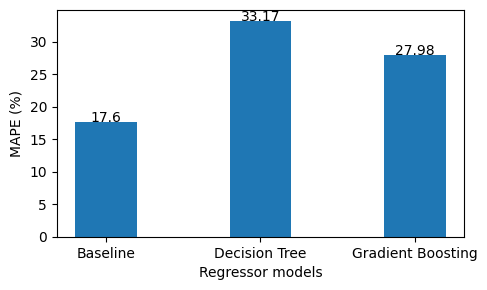

In [ ]:
# --------------------------------------------------------------------------------------------------------------------

print('Comparativa de algoritmos')

gbr_mape = mape(test['porcentaje_riesgo'], test['gbr_pred'])

print(f'Gradient Boosting Regressor: {gbr_mape}%')

fig, ax = plt.subplots(figsize=(5, 3))

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')

plt.tight_layout()


# Conclusiones

**Conclusiones obtenidas del trabajo**:

Tras realizar el curso, logré comprender las etapas, metodologías y enfoque que demanda llevar adelante un proyecto de ciencia de datos. Al momento de elaborar el presente trabajo me encontré con una serie de desafíos desde lo conceptual al momento de plantear la problemática y elegir posibles algoritmos para aplicar y hacer una evaluación en el escenario de la predicción de dengue. Tras interpelar estos desafíos y caminar hacia la senda de su resolución, pude arrobar a las siguientes conclusiones:


1.   Definir el problema correcto, entendiendo no sólo la necesidad sino el contexto de los datos de los que se parte para el aprendizaje.

2.   Conciencia sobre la importancia de contar con el valor de la variable objetivo (en este caso porcentaje de riesgo de contraer dengue), que fue definida de forma empírica e inexacta con información del domino con la que yo contaba;

3.   Entender y reconocer la importancia de comprender los conceptos teóricos sobre matemática, estadística y ciencias de la computación. En mi caso estoy un poco oxidado en cuanto a los dos primeros, dado que no los aplico con frecuencia en mi día a día, lo que me requirió volver a revisar bibliografía sobre esas temáticas.

4.   En el desarrollo del trabajo, me encontré con dificultades para determinar algunas definiciones clave del proceso, como por ejemplo: a- elegir hiperparámetros; b- comprender los modelos; c- ver las métricas para su evaluación como así también determinar las estrategias de preparación y tratamiento de los datos. Ésto me lleva a la conclusión del punto siguiente;

5.   La comprensión y conciencia sobre la importancia de los diferentes roles en el proceso de ciencia de datos y los skills requeridos por cada uno (Ej. Data Analyst, Data Engineer & Data Scientist) entendiendo el hecho de que no se puede abarcar o conocer todo lo que involucra el proceso de ciencia de datos.

6.   La importancia de elegir el modelo más adecuado depende del background de conocimientos sobre las diferentes áreas del aprendizaje automático y el hecho de que la elección del modelo determina otros factores (algoritmo, métricas de evaluación, etc.).

7.   El carácter no determinístico e interativo e incremental del proceso de construcción del modelo, que se va perfeccionando de forma incremental por la evaluación permanente que se hace.

8.   La importancia de elegir bien los conjuntos de datos de entrenamiento y test, y que el ajuste de los hiperparámetros determinan la calidad del aprendizaje e inferencia que hace el modelo.

9.   La importancia para un científico de datos de, además de conocer los marcos teóricos que mencioné, de saber sobre diferentes disciplinas (Ej. programación con Python enfocada en en data science, bases de datos, etc.).

En lo personal por último, quiero mencionar que si bien el abordaje del trabajo presenta muchas falencias y seguramente está alejado de los criterios de evaluación establecidos en la rúbrica, me llevo un gran aprendizaje conceptual, desde la parte de procesos, los roles y un entendimiento de la base teórica de los modelos de aprendizaje automático lo que en un futuro me va a servir para interactuar con perfiles de esta área y poder llevar adelante proyectos de implementación de soluciones entendiendo sus etapas, actividades y roles involucrados.

